In [42]:
# Import the train.csv file into a Pandas DataFrame object
import pandas as pd
import warnings

from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

train_df = pd.read_csv('train.csv')

# Display the first few records of the dataframe
print(train_df.head())

# Display the dimension of the dataframe
print(train_df.shape)

   Activity        D1        D2    D3   D4        D5        D6        D7  \
0         1  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1         1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
2         1  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   
3         1  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606   
4         0  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361   

         D8        D9  ...  D1767  D1768  D1769  D1770  D1771  D1772  D1773  \
0  0.585445  0.743663  ...      0      0      0      0      0      0      0   
1  0.411754  0.836582  ...      1      1      1      1      0      1      0   
2  0.517720  0.679051  ...      0      0      0      0      0      0      0   
3  0.288764  0.805110  ...      0      0      0      0      0      0      0   
4  0.303809  0.812646  ...      0      0      0      0      0      0      0   

   D1774  D1775  D1776  
0      0      0      0  
1      0      1   

In [43]:
# Create a new dataframe called 'y' that contains the values of the target column
y = pd.DataFrame(train_df['Activity'])

# Remove the target column from the original dataframe
train_df = train_df.drop('Activity', axis=1)

# Display the first few records of the dataframe
print(train_df.head())

         D1        D2    D3   D4        D5        D6        D7        D8  \
0  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166  0.585445   
1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105  0.411754   
2  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453  0.517720   
3  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606  0.288764   
4  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361  0.303809   

         D9       D10  ...  D1767  D1768  D1769  D1770  D1771  D1772  D1773  \
0  0.743663  0.243144  ...      0      0      0      0      0      0      0   
1  0.836582  0.106480  ...      1      1      1      1      0      1      0   
2  0.679051  0.352308  ...      0      0      0      0      0      0      0   
3  0.805110  0.208989  ...      0      0      0      0      0      0      0   
4  0.812646  0.125177  ...      0      0      0      0      0      0      0   

   D1774  D1775  D1776  
0      0      0      0  
1      0      1   

In [44]:
print(y.head())

   Activity
0         1
1         1
2         1
3         1
4         0


In [45]:
# Determine the ratio of classes in the existing data set. To do this, display the proportion of records belonging to each of the classes in the total number of records.
print(y.groupby('Activity').size() / len(train_df))

Activity
0    0.457745
1    0.542255
dtype: float64


In [46]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier with 20 trees
forest = RandomForestClassifier(n_estimators=20, max_depth=2, oob_score=True, random_state=1)

# Train the model on the training data
forest = forest.fit(train_df, y['Activity'])

# Determine the quality of the model
print(forest.oob_score_)

0.642495334577446


In [47]:
# Create similar random forests with 50, 10, 150 and 200 trees. Train these models and for each of them get an OOB score.

def random_forest_classifier(n_estimators):
    clfr = RandomForestClassifier(n_estimators=n_estimators, max_depth=2, oob_score=True, random_state=1)
    clfr = clfr.fit(train_df, y['Activity'])
    return clfr


# Create a list of the number of trees to be tested
n_estimators = [50, 10, 150, 200]

# Create an empty list to store the OOB scores
oob_scores = []

# Loop through the number of trees and append the OOB score to the list
for n in n_estimators:
    classifier = random_forest_classifier(n)
    oob_scores.append(classifier.oob_score_)

# Print the list of OOB scores
print(oob_scores)

[0.6670221274326846, 0.6262330045321247, 0.682751266328979, 0.6848840309250867]


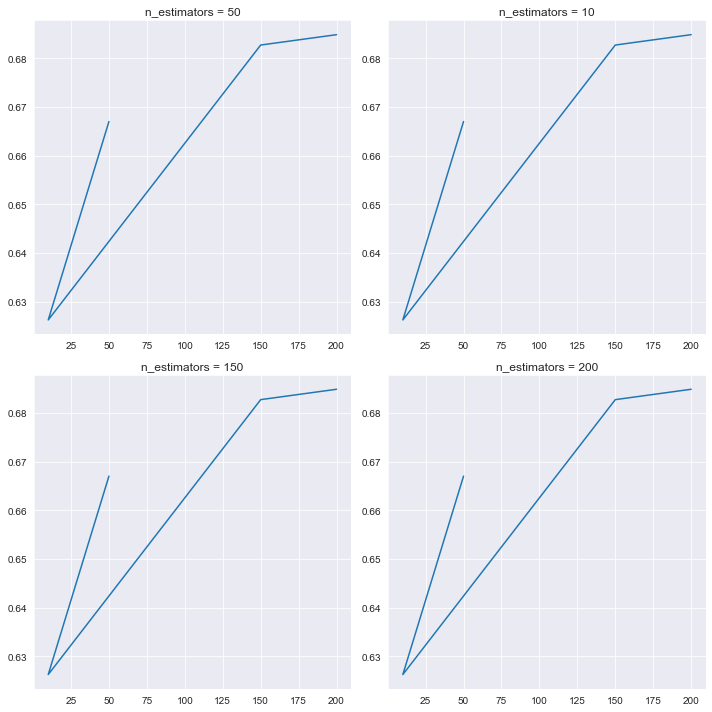

In [48]:
# Construct a graph of dependence of the random forest quality assessment on the number of basic algorithms

# Create a figure with 2x2 subplot layout
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Loop through the number of trees and plot the OOB score vs number of trees
for i, n in enumerate(n_estimators):
    classifier = random_forest_classifier(n)
    ax[i // 2, i % 2].plot(n_estimators, oob_scores)
    ax[i // 2, i % 2].set_title('n_estimators = {}'.format(n))

# Display the plot
plt.tight_layout()
plt.show()

In [49]:
# Analyze the possibilities of models with trees of depth 10.


def random_forest_classifier_10(n_estimators):
    clfr = RandomForestClassifier(n_estimators=n_estimators, max_depth=10, oob_score=True, random_state=1)
    clfr = clfr.fit(train_df, y['Activity'])
    return clfr


# Create an empty list to store the OOB scores
oob_scores = []


# Loop through the number of trees and append the OOB score to the list
for n in n_estimators:
    classifier = random_forest_classifier_10(n)
    oob_scores.append(classifier.oob_score_)

# Print the list of OOB scores
print(oob_scores)

[0.7832577979205545, 0.7374033591042388, 0.7917888563049853, 0.7971207677952546]


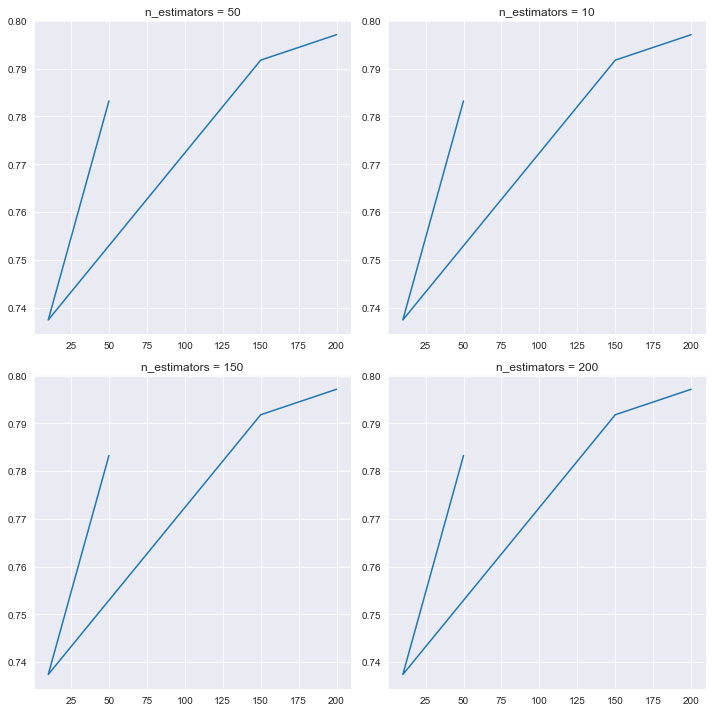

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Loop through the number of trees and plot the OOB score vs number of trees
for i, n in enumerate(n_estimators):
    classifier = random_forest_classifier_10(n)
    ax[i // 2, i % 2].plot(n_estimators, oob_scores)
    ax[i // 2, i % 2].set_title('n_estimators = {}'.format(n))

# Display the plot
plt.tight_layout()
plt.show()